# 6 Comparative analysis

In [1]:
! pip install .

Processing /home/jovyan/work/latent-dirichlet-allocation
  Running setup.py bdist_wheel for lda-package ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/55/df/03/5c2615a45fff840cc1dac92c4e9d5fa0e8c00f0d88616624ee
Successfully built lda-package
  Found existing installation: lda-package 1.0
    Uninstalling lda-package-1.0:
      Successfully uninstalled lda-package-1.0


In [2]:
import lda_package
import numpy as np
from scipy.special import digamma, polygamma
import matplotlib.pyplot as plt 

In [13]:
def perplexity(N, M, gamma, phi):
    
    """
    A method to evaluate models with held-out set.
    
    """
    preplexity = 0.0
    for m in range(M):
        for w in range(N[m]):
            preplexity += np.log(np.sum(gamma[m,:] * phi[m][w,:]))
    return np.exp(-(preplexity / np.sum(N)))
    
    

In [3]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."

# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]  

In [6]:
texts, dictionary, corpus = lda_package.data_clean(doc_set)
text_ = lda_package.data_process(texts, dictionary)

In [7]:
M = len(texts)
k = 5
N = np.array(list(map(len, text_)))
V = len(dictionary)
V_words = range(V)
alpha = np.random.dirichlet(10*np.ones(k),1)[0]
beta = np.random.dirichlet(np.ones(V),k)

phi = np.array([1/k*np.ones([N[m],k]) for m in range(M)])
gamma = np.tile(alpha,(M,1)) + np.tile(N/k,(k,1)).T

In [8]:
lda = lda_package.variation_EM(M, k, text_, N, V_words, alpha, beta, gamma, phi, iteration = 1000)

In [11]:
perplexity(N, M, lda[2], lda[3])

0.37538657541910847

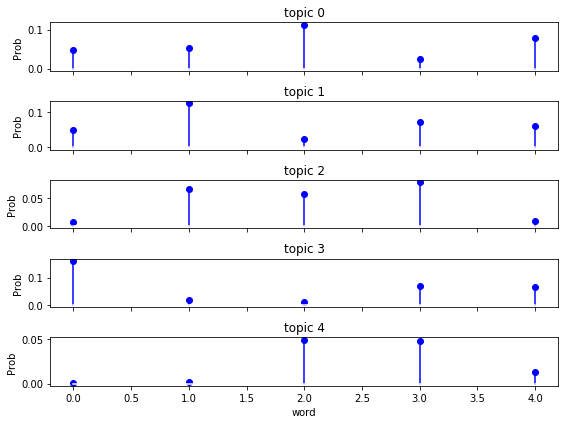

In [12]:
f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)  
for i, k in enumerate(range(5)):  
    ax[i].stem(lda[1][:,k], linefmt='b-',  
               markerfmt='bo', basefmt='w-')  
#     ax[i].set_xlim(-50,4350)  
#     ax[i].set_ylim(0, 0.08)  
    ax[i].set_ylabel("Prob")  
    ax[i].set_title("topic {}".format(k))  
  
ax[4].set_xlabel("word")  
  
plt.tight_layout()  
plt.show()  

In [14]:
import artm

ModuleNotFoundError: No module named 'artm'

In [88]:
#LSI
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=1000)
print(np.exp(lsi.log_perplexity(corpus)))

AttributeError: 'LsiModel' object has no attribute 'log_perplexity'

In [84]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import numpy as np

docs = [["a", "a", "b"], 
        ["a", "c", "g"], 
        ["c"],
        ["a", "c", "g"]]

dct = Dictionary(docs)
corpus = [dct.doc2bow(_) for _ in docs]
c_train, c_test = corpus[:2], corpus[2:]

ldamodel = LdaModel(corpus=c_train, num_topics=2, id2word=dct)
print(np.exp(ldamodel.log_perplexity(c_test)))

0.09181700702082225


In [87]:
corpus[:2]

[[(0, 2), (1, 1)], [(0, 1), (2, 1), (3, 1)]]